In [5]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('df_engineered_desktop_pc.csv')

In [8]:
print(df.head())
print(df.info())
print(df.describe())

                                              titulo tipo_de_producto  \
0                           Apple Mac mini M4 [2024]          Mini PC   
1                Apple Mac mini M4 [2024]\nMU9D3YP/A          Mini PC   
2  Ankermann Business Work V2 PC (4260561746335) ...    PC multimedia   
3                   Zone Evil ZE-160937\nZE-160937-H        PC gaming   
4                    Adonia Gaming R7 5800X RTX 4060        PC gaming   

                     serie            procesador  \
0           Apple Mac Mini               Unknown   
1           Apple Mac Mini              Apple M4   
2  Ankermann Business Work     AMD Ryzen 5 5600G   
3                Zone Evil  Intel Core i5-13400F   
4            Adonia Gaming     AMD Ryzen 7 5800X   

  disco_duro_tipo_de_disco_duro procesador_fabricante procesador_tipo  \
0                disco duro SSD                 Intel         Apple M   
1                disco duro SSD                 Apple         Apple M   
2            disco duro M.2 S

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   titulo                                        3936 non-null   object 
 1   tipo_de_producto                              3936 non-null   object 
 2   serie                                         3936 non-null   object 
 3   procesador                                    3936 non-null   object 
 4   disco_duro_tipo_de_disco_duro                 3936 non-null   object 
 5   procesador_fabricante                         3936 non-null   object 
 6   procesador_tipo                               3936 non-null   object 
 7   disco_duro_numero_de_discos_duros_instalados  3936 non-null   float64
 8   sistema_operativo_sistema_operativo           3936 non-null   object 
 9   procesador_nombre_clave                       3936 non-null   o

In [10]:
numerical_features = []
categorical_features = []
target_variable = 'precio_mean'

df.dropna(subset=[target_variable], inplace=True)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

actual_numerical_features = [col for col in numerical_features if col in X.columns]
actual_categorical_features = [col for col in categorical_features if col in X.columns]

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, actual_numerical_features),
    ('categorical', categorical_pipeline, actual_categorical_features)
], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

try:
    onehot_feature_names = preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(actual_categorical_features)
except AttributeError:
     onehot_feature_names = []

remainder_feature_names = [col for col in X.columns if col not in actual_numerical_features and col not in actual_categorical_features]

processed_feature_names = list(actual_numerical_features) + list(onehot_feature_names) + list(remainder_feature_names)

X_train_processed_df = pd.DataFrame(X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed, columns=processed_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed, columns=processed_feature_names)

print("Shape of processed training data:", X_train_processed_df.shape)
print("Shape of processed testing data:", X_test_processed_df.shape)
print("First 5 rows of processed training data:")
print(X_train_processed_df.head())


Shape of processed training data: (3148, 36)
Shape of processed testing data: (788, 36)
First 5 rows of processed training data:
                                          titulo tipo_de_producto  \
0        Intel NUC Kit\nNUC6i5SYK (BOXNUC6I5SYK)          Mini PC   
1  Vibox V-112 Gaming PC Ryzen 5 4500 / RTX 3070        PC gaming   
2           Blackview MP80\nN5095 + 16GB + 512GB          Mini PC   
3             Lenovo ThinkCentre M75q Gen 2 Tiny    PC de oficina   
4                 ASUS U500MA\nU500MA-75700G0090    PC multimedia   

                serie           procesador disco_duro_tipo_de_disco_duro  \
0           Intel NUC  Intel Core i5-6260U                disco duro SSD   
1               Vibox     AMD Ryzen 5 4500                disco duro SSD   
2           Blackview  Intel Celeron N5095            disco duro M.2 SSD   
3  Lenovo ThinkCentre              Unknown                disco duro SSD   
4                ASUS    AMD Ryzen 7 5700G                disco duro SSD   


The output of the code cell provides a summary of the data preprocessing results. It indicates that the processed training dataset (X_train_processed_df) contains 3148 samples and 36 features. Similarly, the processed testing dataset (X_test_processed_df) consists of 788 samples and also has 36 features. The consistency in the number of features (36) between the training and testing sets is crucial, as it confirms that the preprocessing steps were applied uniformly to both, which is necessary for the machine learning model to function correctly.

The display of the first 5 rows of X_train_processed_df offers a snapshot of the transformed data. It shows a DataFrame where the original features have been scaled (if numerical) or one-hot encoded (if categorical), resulting in the 36 columns. This allows for a quick visual check to ensure the transformations appear as expected and that the data is now in a numerical format suitable for input into a KNN algorithm or other machine learning models. The column names reflect the original features or the newly created features from one-hot encoding.

In [11]:
target_variable = 'precio_mean'

selected_numerical_features = [
    'procesador_frecuencia_turbo_max_ghz',
    'procesador_numero_nucleos',
    'disco_duro_capacidad_de_memoria_ssd_gb',
    'ram_memoria_gb',
    'ram_frecuencia_de_la_memoria_mhz',
]

selected_categorical_features = [
    'procesador',
    'procesador_tipo',
    'grafica_tarjeta',
    'ram_tipo',
    'sistema_operativo_sistema_operativo',
    'alimentacion_wattage_binned',
]

df.dropna(subset=[target_variable], inplace=True)

all_features_for_model = selected_numerical_features + selected_categorical_features

print(f"Dataset size before dropping NaNs in selected features: {len(df)}")
df_cleaned = df.dropna(subset=all_features_for_model).copy()
print(f"Dataset size after dropping NaNs in selected features: {len(df_cleaned)}")

if df_cleaned.empty:
    raise ValueError("DataFrame is empty after dropping NaNs from selected features. Consider imputing missing values or using features with fewer NaNs. Check the non-null counts of your selected features.")

X = df_cleaned[all_features_for_model]
y = df_cleaned[target_variable]

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, selected_numerical_features),
    ('categorical', categorical_pipeline, selected_categorical_features)
], remainder='drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv('X_train_original_for_knn_lookup_desktop.csv', index=False) 
print("Saved X_train_original_for_knn_lookup_desktop.csv")

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

import joblib
joblib.dump(preprocessor, 'preprocessor_desktop_knn.joblib')
print("Saved preprocessor_desktop_knn.joblib")

processed_numerical_features = selected_numerical_features
try:
    processed_onehot_features = list(preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(selected_categorical_features))
except Exception as e:
    print(f"Warning: Could not get feature names from OneHotEncoder automatically: {e}. Fallback might be needed if column names are incorrect.")
    num_onehot_cols = X_train_processed.shape[1] - len(processed_numerical_features)
    processed_onehot_features = [f'onehot_feature_{i}' for i in range(num_onehot_cols)]

processed_feature_names = processed_numerical_features + processed_onehot_features

if X_train_processed.shape[1] == len(processed_feature_names):
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_feature_names, index=X_test.index)
else:
    print(f"Warning: Shape mismatch. Processed features: {X_train_processed.shape[1]}, Names generated: {len(processed_feature_names)}")
    X_train_processed_df = pd.DataFrame(X_train_processed, index=X_train.index)
    X_test_processed_df = pd.DataFrame(X_test_processed, index=X_test.index)

print(f"\nOriginal X_train shape: {X_train.shape}")
print(f"Processed X_train_processed_df shape: {X_train_processed_df.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Processed X_test_processed_df shape: {X_test_processed_df.shape}")

if not X_train_processed_df.empty:
    print("\nFirst 5 rows of processed training data (X_train_processed_df):")
    print(X_train_processed_df.head())
else:
     print("\nWarning: Processed training data is empty or DataFrame creation failed. Check preprocessing steps and data integrity.")

Dataset size before dropping NaNs in selected features: 3936
Dataset size after dropping NaNs in selected features: 3936
Saved X_train_original_for_knn_lookup_desktop.csv
Saved preprocessor_desktop_knn.joblib

Original X_train shape: (3148, 11)
Processed X_train_processed_df shape: (3148, 517)
Original X_test shape: (788, 11)
Processed X_test_processed_df shape: (788, 517)

First 5 rows of processed training data (X_train_processed_df):
      procesador_frecuencia_turbo_max_ghz  procesador_numero_nucleos  \
2339                            -3.420241                  -1.497148   
3048                            -1.159463                  -0.723284   
1556                            -0.029074                  -1.110216   
1907                            -0.029074                  -0.336353   
578                             -0.217472                  -0.336353   

      disco_duro_capacidad_de_memoria_ssd_gb  ram_memoria_gb  \
2339                                0.225434       -0.383279  

The output first confirms the initial state and an early cleaning step, showing that the dataset size remained at 3936 samples both before and after an attempt to drop rows with missing values in the selected features. This indicates that the chosen features for the model, along with the target variable, either had no missing data or were pre-cleaned. The subsequent messages confirm the successful saving of two key files: X_train_original_for_knn_lookup_desktop.csv, which archives the untransformed training features, and preprocessor_desktop_knn.joblib, which stores the fitted preprocessing pipeline. Saving these allows for consistent application of transformations to new data and aids in reproducibility.

A significant observation from the output is the change in data dimensionality. The original training and testing sets, X_train and X_test, initially had 11 features. After the preprocessing steps, which included scaling for numerical features and one-hot encoding for categorical features, the resulting DataFrames, X_train_processed_df and X_test_processed_df, expanded to 517 features while maintaining their respective sample counts (3148 for training, 788 for testing). This substantial increase in feature count is characteristic of one-hot encoding, where each unique category within the original categorical columns is converted into a new binary feature.

Finally, the preview of the first five rows of X_train_processed_df provides a glimpse into the structure of the transformed data. Numerical features, such as procesador_frecuencia_turbo_max_ghz and ram_memoria_gb, now display scaled values, which are typically standardized to have a mean near zero and unit variance. The numerous columns with names prefixed by procesador_, sistema_operativo_sistema_operativo_, and alimentacion_wattage_binned_ represent the one-hot encoded categorical features. These columns consist of 0s and 1s, indicating the presence or absence of a specific category for each sample. This transformed dataset, with its purely numerical representation, is now suitably prepared for input into a K-Nearest Neighbors regressor or other machine learning algorithms.

In [17]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train_processed_df, y_train)

y_pred_knn = knn_regressor.predict(X_test_processed_df)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"\nKNeighborsRegressor Performance:")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R-squared: {r2_knn:.2f}")

predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price (KNN)': y_pred_knn})
print("\nSample Predictions:")
print(predictions_df.head())


KNeighborsRegressor Performance:
RMSE: 1149.23
R-squared: 0.38

Sample Predictions:
      Actual Price  Predicted Price (KNN)
1593       3079.74               3058.616
465         261.00                257.038
1615       2106.13               1775.440
490         482.76                558.436
1926       1234.34                954.798


This regression model for numerical columns was discarded given the lower performance on the evaluation metrics. The Root Mean Squared Error (RMSE) of 1149.23 indicates that, on average, the model's price predictions deviated from the actual prices by a considerable margin. More significantly, the R-squared value of 0.38 suggests that the model could only explain approximately 38% of the variability in the prices based on the selected numerical features. This low R-squared value signifies a weak fit of the model to the data, implying that a substantial portion of the price variation was not captured, leading to the decision to discard this particular regression approach.

In [15]:
nn_model = NearestNeighbors(n_neighbors=6, metric='minkowski')
nn_model.fit(X_train_processed_df)

print("\nNearestNeighbors model fitted.")
print(f"Model will find the {nn_model.n_neighbors -1 } most similar items from the training set.")

joblib.dump(nn_model, 'nn_model_desktop.joblib')
print("Saved nn_model_desktop.joblib")


NearestNeighbors model fitted.
Model will find the 5 most similar items from the training set.
Saved nn_model_desktop.joblib


In [16]:
if not X_test_processed_df.empty and not X_train_processed_df.empty:
    sample_index_in_test_df = 0
    
    original_X_test_index = X_test.index[sample_index_in_test_df]

    query_item_processed = X_test_processed_df.iloc[[sample_index_in_test_df]]
    query_item_original_features = X_test.loc[[original_X_test_index]] # Use .loc with original index
    query_item_actual_price = y_test.loc[original_X_test_index]

    print("\n======================================================================")
    print(f"QUERY ITEM (Original Test Set Index: {original_X_test_index})")
    print("----------------------------------------------------------------------")
    print("Original Features (Selected):")
    query_display_features = ['tipo_de_producto', 'procesador_fabricante', 'ram_memoria_gb', 
                              'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador', 'grafica_tarjeta']
    for col in query_display_features:
        if col in query_item_original_features.columns:
            print(f"  {col}: {query_item_original_features[col].values[0]}")
        else:
            print(f"  {col}: (Not available in query item)")
    print(f"Actual Price: {query_item_actual_price:.2f}")
    print("======================================================================")

    distances, indices_in_X_train_processed = nn_model.kneighbors(query_item_processed)
    
    neighbor_original_indices = X_train.index[indices_in_X_train_processed.flatten()]

    print(f"\n{nn_model.n_neighbors -1} MOST SIMILAR OFFERS (from training set)")
    print("----------------------------------------------------------------------")
    
    neighbor_data_for_df = []
    neighbor_display_features = ['tipo_de_producto', 'procesador_fabricante', 'ram_memoria_gb', 
                                 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador', 'grafica_tarjeta']


    for i, (original_idx, dist) in enumerate(zip(neighbor_original_indices, distances.flatten())):
        neighbor_original_subset = X_train.loc[original_idx] 
        neighbor_actual_price = y_train.loc[original_idx]
        
        if original_idx in X_train_processed_df.index:
            neighbor_processed_features_for_pred = X_train_processed_df.loc[[original_idx]]
            neighbor_predicted_price = knn_regressor.predict(neighbor_processed_features_for_pred)[0]
        else:
            print(f"Warning: Original index {original_idx} not found in X_train_processed_df. Cannot get KNN predicted price for this neighbor.")
            neighbor_predicted_price = np.nan 
        
        neighbor_info = {
            'Rank': i + 1,
            'Train_Index': original_idx,
            'Similarity_Dist': f"{dist:.4f}",
            'Actual_Price': f"{neighbor_actual_price:.2f}",
            'Predicted_Price_KNN': f"{neighbor_predicted_price:.2f}" if pd.notna(neighbor_predicted_price) else "N/A"
        }
        
        for col_key in neighbor_display_features:
            if col_key in neighbor_original_subset:
                neighbor_info[col_key.replace('_', ' ').title()] = neighbor_original_subset[col_key]
            else:
                neighbor_info[col_key.replace('_', ' ').title()] = "N/A"
        
        neighbor_data_for_df.append(neighbor_info)

    column_order = ['Rank', 'Train_Index', 'Similarity_Dist', 'Actual_Price', 'Predicted_Price_KNN'] + \
                   [col.replace('_', ' ').title() for col in neighbor_display_features]

    results_df = pd.DataFrame(neighbor_data_for_df)
    
    final_columns = [col for col in column_order if col in results_df.columns]
    results_df = results_df[final_columns]

    try:
        from IPython.display import display
        display(results_df) 
    except ImportError:
        print("Results DataFrame (use .to_string() for better console view if needed):")
        print(results_df.to_string(index=False)) # index=False for cleaner look

    print("======================================================================")

else:
    print("\nSkipping example usage as processed data (X_test_processed_df or X_train_processed_df) is empty or not available.")




QUERY ITEM (Original Test Set Index: 1593)
----------------------------------------------------------------------
Original Features (Selected):
  tipo_de_producto: (Not available in query item)
  procesador_fabricante: (Not available in query item)
  ram_memoria_gb: 16.0
  disco_duro_capacidad_de_memoria_ssd_gb: 1000.0
  procesador: Unknown
  grafica_tarjeta: Intel UHD Graphics 770
Actual Price: 3079.74

5 MOST SIMILAR OFFERS (from training set)
----------------------------------------------------------------------


,Rank,Train_Index,Similarity_Dist,Actual_Price,Predicted_Price_KNN,Tipo De Producto,Procesador Fabricante,Ram Memoria Gb,Disco Duro Capacidad De Memoria Ssd Gb,Procesador,Grafica Tarjeta
0,1,1774,0.0000,2697.89,1930.47,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
1,2,48,0.0000,1584.88,1930.47,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
2,3,418,0.0000,1230.59,1930.47,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
3,4,539,0.0000,3222.46,1930.47,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
4,5,158,0.0000,916.55,1930.47,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
5,6,118,0.0000,717.44,1930.47,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770


This output details the K-Nearest Neighbors (KNN) prediction process for a specific query item from the test set (Index 1593), which has an actual price of 3079.74. The model identified the five most similar items from the training set. Notably, all these neighbors have a Similarity_Dist of 0.0000, indicating that, based on the selected and processed features, they are considered identical to the query item. The features shown for these neighbors (Ram Memoria Gb, Disco Duro Capacidad De Memoria Ssd Gb, Procesador, and Grafica Tarjeta) perfectly match those of the query item, with other features being unavailable or N/A.
The Predicted_Price_KNN for the query item is 1930.47. This prediction is derived by averaging the Actual_Price of these five "identical" training set neighbors (which range from approximately 717.44 to 3222.46). The fact that items with identical features (according to the model) have such a wide spread in actual prices, and that the model's prediction based on their average is considerably different from the query item's actual price, suggests that the current feature set might not be capturing all the factors that influence price, or that the model is struggling with the data's characteristics.

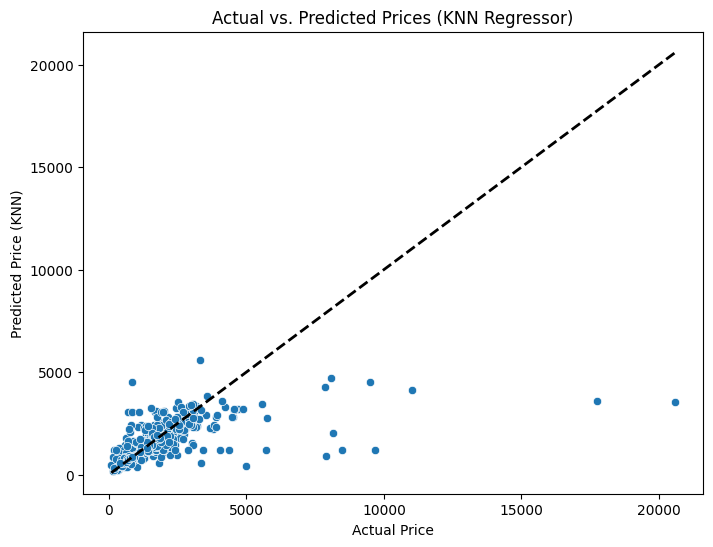

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (KNN)")
plt.title("Actual vs. Predicted Prices (KNN Regressor)")
plt.show()

This scatter plot visually represents the performance of the KNN regressor by plotting actual prices against the prices predicted by the model. Each blue dot corresponds to an individual item from the test set. The dashed black line running diagonally represents a perfect prediction scenario, where the predicted price would exactly match the actual price.

From the plot, we can observe that most of the data points are clustered in the lower price range, generally below 5000. In this region, while there's some scatter, many predictions appear to be somewhat close to the ideal line. However, as the actual price increases beyond this range, the model's performance degrades given there is a smaller sample of items for those prices.

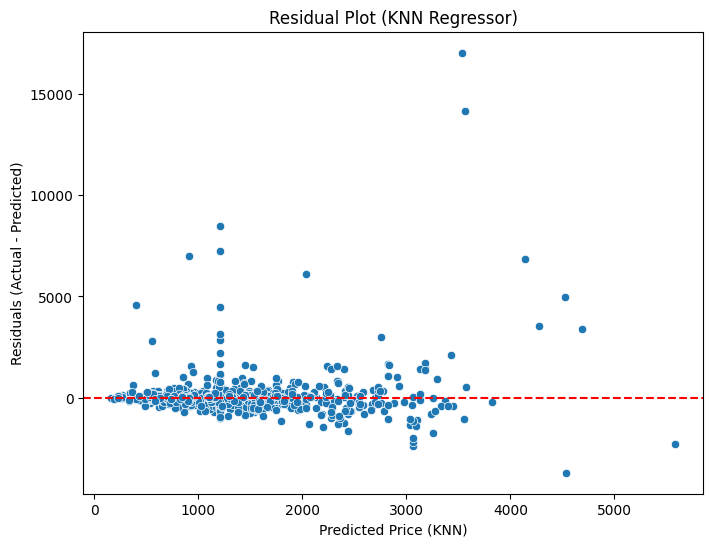

In [12]:
residuals_knn = y_test - y_pred_knn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_knn, y=residuals_knn)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (KNN)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (KNN Regressor)")
plt.show()

This residual plot provides insights into the KNN regressor's performance by visualizing its prediction errors. Ideally, for a well-performing model, the residuals (the differences between actual and predicted prices) should be randomly scattered around the horizontal red dashed line at zero, with no discernible pattern, and a consistent spread across all predicted price levels.

In this plot, we observe that for predicted prices roughly below 3000, the residuals are mostly clustered around the zero line, suggesting that the model's predictions are, on average, relatively close to the actual values in this range, though there is still some spread. However, as the predicted price increases, particularly beyond 3000, the scatter of the residuals becomes more pronounced and less uniform.